<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data_encoded = pd.get_dummies(data, drop_first=True)
correlation_matrix = data_encoded.corr()
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Gender_Male               0.057400  0.060867            0.056410   

                        Spending Score (1-100)  Gender_Male  
CustomerID                            0.013835     0.057400  
Age                                  -0.327227     0.060867  
Annual Income (k$)                    0.009903     0.056410  
Spending Score (1-100)                1.000000    -0.058109  
Gender_Male                          -0.058109     1.000000  


In [6]:
# Data Analysis
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Distribution of Annual Income

<ipython-input-7-767c19680c9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


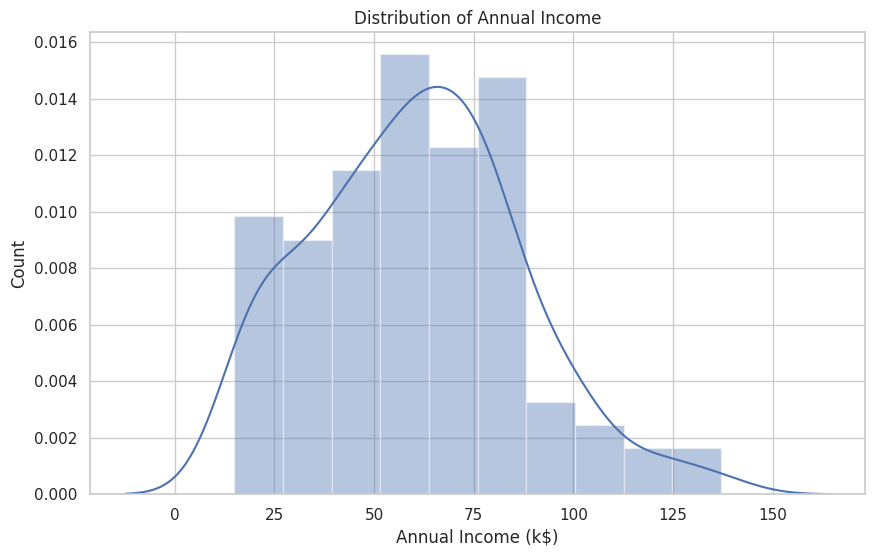

In [7]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

Distribution of Age

<ipython-input-8-b395f8dcef04>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


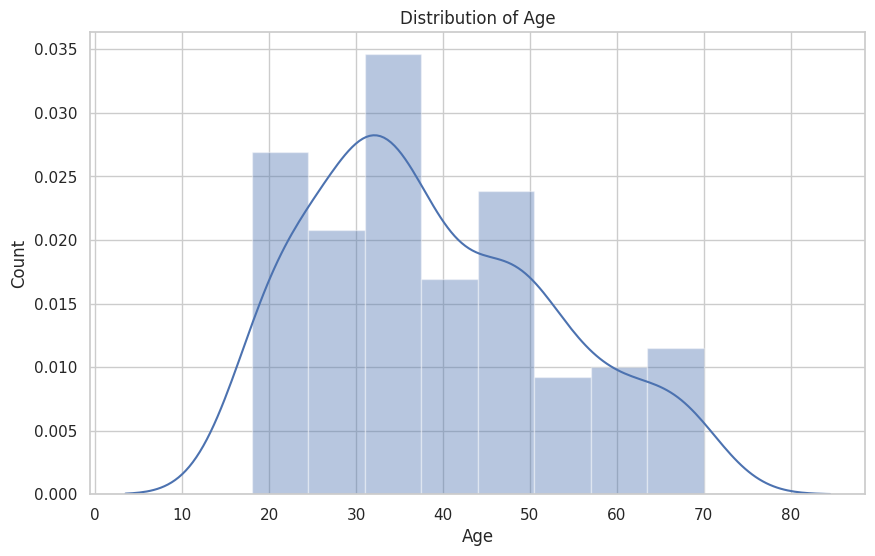

In [8]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-9-a93324171c4f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


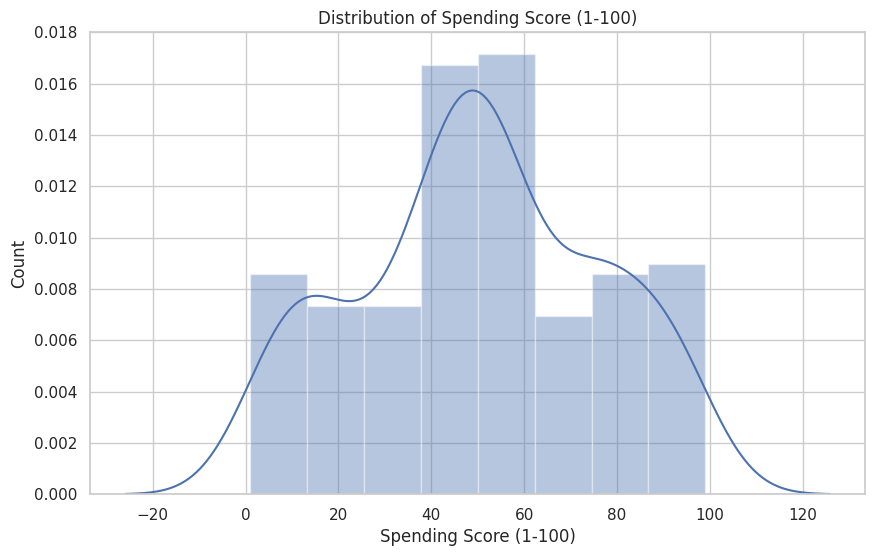

In [9]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

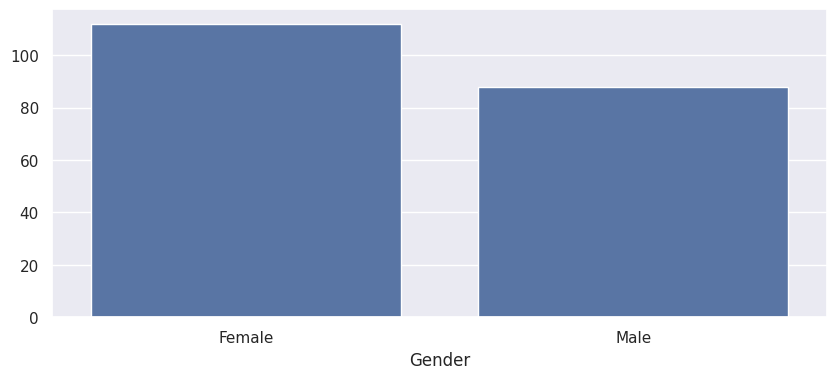

In [10]:
genders=data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values)
plt.show()

In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
df=data[[
    'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender','CustomerID'
]]

In [15]:
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


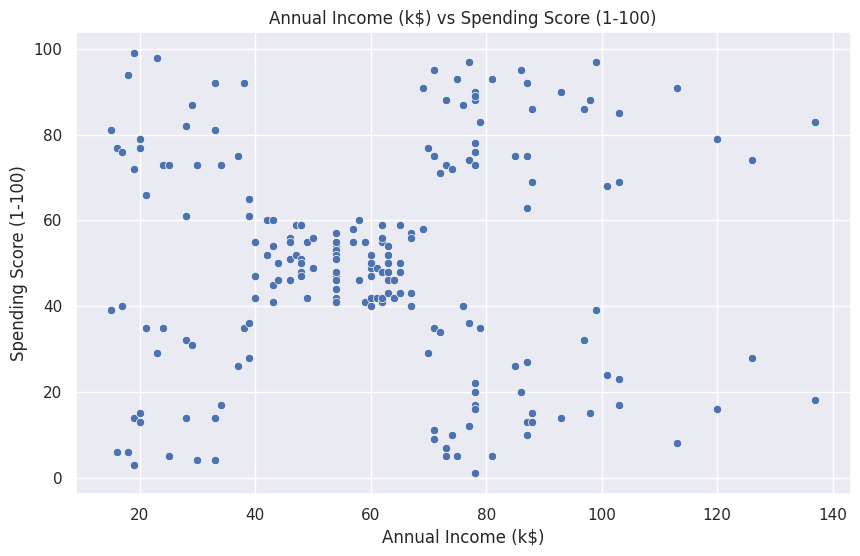

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [19]:
from sklearn.cluster import KMeans

In [23]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

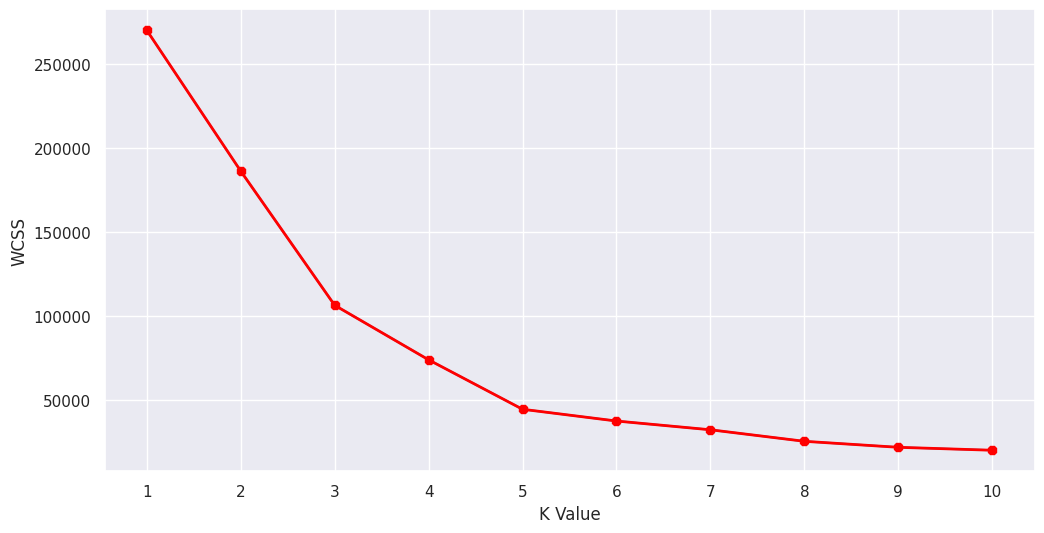

In [24]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [27]:
km1=KMeans(n_clusters=5)

In [28]:
km1.fit(X)
y=km1.predict(X)
df["label"]=y
df.head()

<ipython-input-28-3240481ae57a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]=y


,Age,Annual Income (k$),Spending Score (1-100),Gender,CustomerID,label
0,19,15,39,Male,1,1
1,21,15,81,Male,2,3
2,20,16,6,Female,3,1
3,23,16,77,Female,4,3
4,31,17,40,Female,5,1


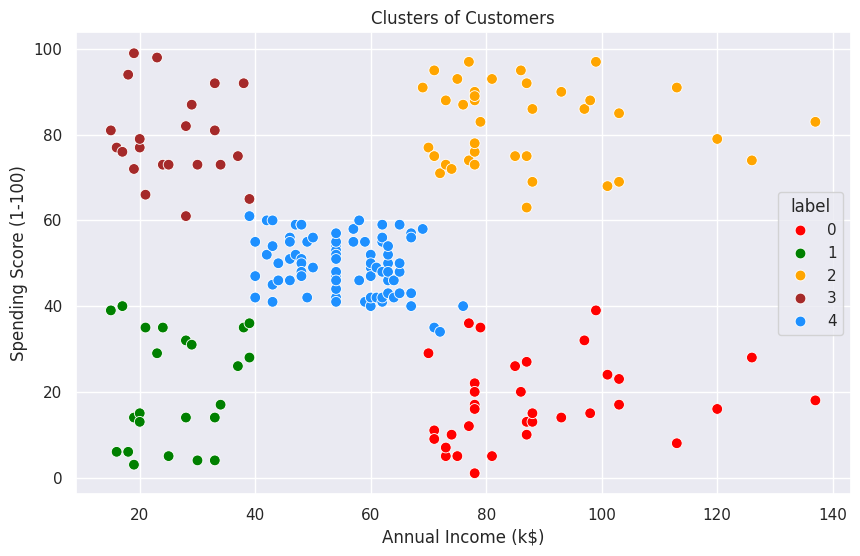

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="label",
                palette=['red','green','orange','brown','dodgerblue'],
                legend='full', data=df, s=60)
plt.title('Clusters of Customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [31]:
# number of customers in each cluster
df['label'].value_counts()

,count
label,
4,81
2,39
0,35
1,23
3,22


3d data

In [32]:
df2=data[[
    'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender','CustomerID'
       ]]

In [33]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,CustomerID
0,19,15,39,Male,1
1,21,15,81,Male,2
2,20,16,6,Female,3
3,23,16,77,Female,4
4,31,17,40,Female,5


In [34]:
X=df2[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [36]:
from sklearn.cluster import KMeans

In [39]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++')
  km.fit(X)
  wcss.append(km.inertia_)

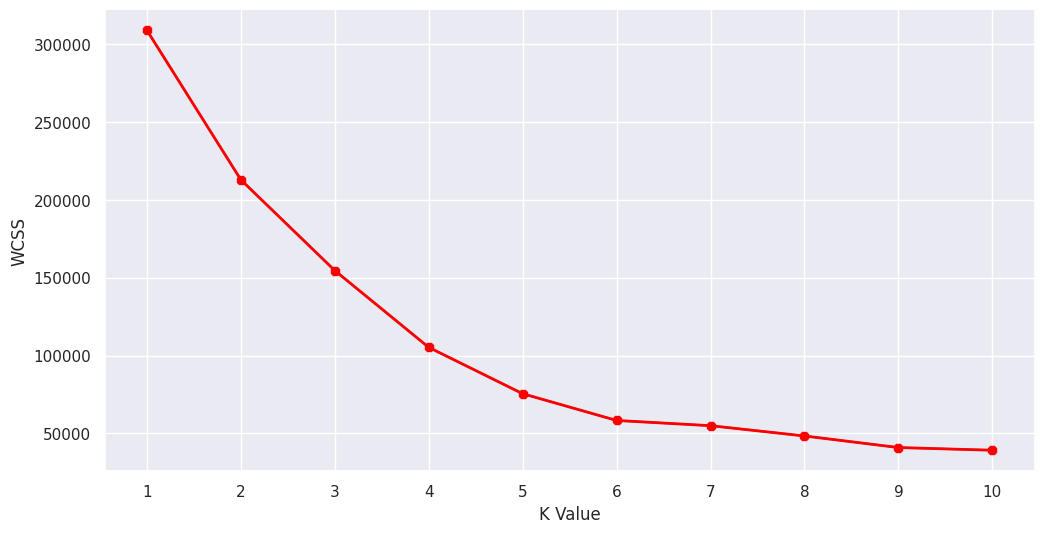

In [40]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [41]:
km2=KMeans(n_clusters=5)
km2.fit(X)
y=km2.predict(X)
df["label"]=y
df.head()

<ipython-input-41-34df8f0e8323>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]=y


,Age,Annual Income (k$),Spending Score (1-100),Gender,CustomerID,label
0,19,15,39,Male,1,4
1,21,15,81,Male,2,3
2,20,16,6,Female,3,4
3,23,16,77,Female,4,3
4,31,17,40,Female,5,4


In [42]:
from mpl_toolkits.mplot3d import Axes3D

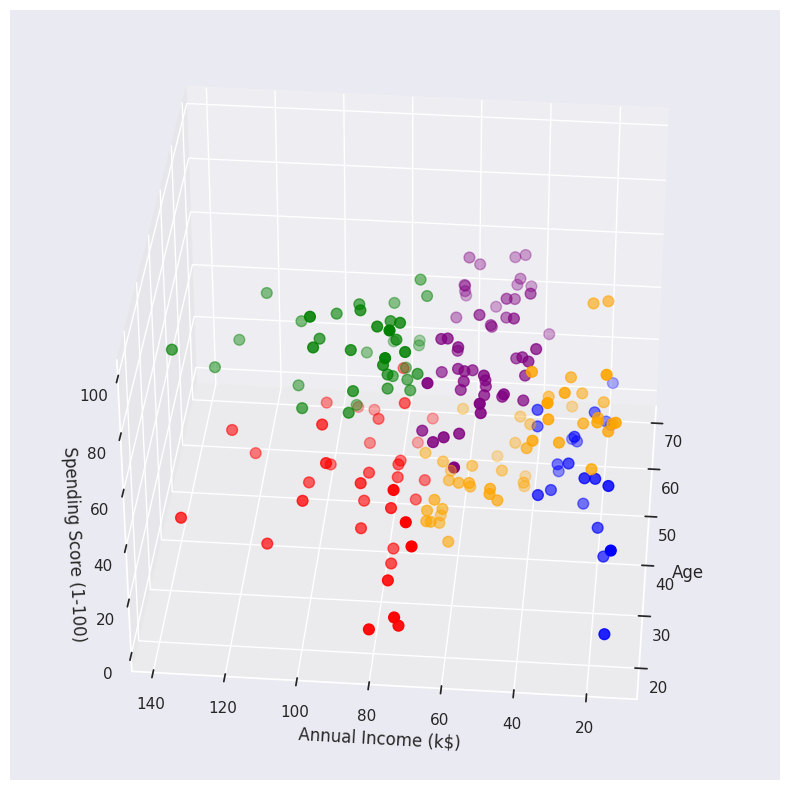

In [44]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0], df['Annual Income (k$)'][df.label==0], df['Spending Score (1-100)'][df.label==0],c='purple',s=60)
ax.scatter(df.Age[df.label==1], df['Annual Income (k$)'][df.label==1], df['Spending Score (1-100)'][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2], df['Annual Income (k$)'][df.label==2], df['Spending Score (1-100)'][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label==3], df['Annual Income (k$)'][df.label==3], df['Spending Score (1-100)'][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4], df['Annual Income (k$)'][df.label==4], df['Spending Score (1-100)'][df.label==4],c='blue',s=60)

ax.view_init(35,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [45]:
# number of customers in each cluster
df['label'].value_counts()

,count
label,
0,52
3,50
2,39
1,37
4,22
